# <div align="center">Calculus, 2022-1-IM-1</div>

<h3><div align="right">Name:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Sequence Number:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div></h3>


<big>
<big>
For the functions:<br>
$$ i^\circ)\quad f(x)=x^4-4x^2\text{ for } x\in\mathbf{[-1,1]},\quad 
   ii^\circ)\quad f(x)=x +\cos x \text{ for } x\in\mathbf{[0,\pi]}
$$ 
$1.^\circ)$ Calculate the first-order derivative, $f'(x)$. (5%)<br>
$2.^\circ)$ Calculate the second-order derivative, $f''(x)$. (5%)<br>
$3.^\circ)$ Find out all the critical point(s) if any. (5%)<br>
$4.^\circ)$ Determine the monotonicity of $f(x)$, i.e. at which $f(x)$ is increasing, or at which it is decreasing. (5%)<br>
$5.^\circ)$ Determine the concavity of $f(x)$. (5%)<br> 
$6.^\circ)$ Find out all the relative extrema of $f(x)$. (5%)<br> 
$7.^\circ)$ Find out all the extrema of $f(x)$ and explain your answer. (5%,2%-2%-1%)<br>
$8.^\circ)$ Find out all the asymptote(s) of $f(x)$ if any and explain your answer. (5%,2%-2%-1%)<br>
$9.^\circ)$ Visualize the graph of $f(x)$. (5%)<br>
$10.^\circ)$ (Only for $i^\circ)$) Find the value of $c$ at which satisfies Mean Value Theorem for $f(x)$ on $[a,b]=[-1,1]$(10%):<br>
    $$ f'(c)=\frac{f(b)-f(a)}{b-a}$$
</big> 

Answer
---

i). $f(x)=x^4-x^2$ for $x\in[-1,1]$.
  1. $f'(x)=4x^3-2x=2x(2x^2-1)$ .
  2. $f''(x)=12x^2-2$
  3. $x=0,\pm1/\sqrt2$
  4. $f$ is increasing if $x\in[-1/\sqrt2,0]\cup[1/\sqrt2,1]$, else decreasing.
  5. $f$ concave upwards for $x\in [ -1,-1/\sqrt6]\cup[1/\sqrt6,1]$ and downwards for $x\in [-1/\sqrt6,1/\sqrt6]$.
  6. three relative maxima $f(0)=f(\pm1)=0$ and two relative minima $f(\pm1/\sqrt2)=-1/4$.
  7. minimum, $1-/4$,  maximum since $0$.
  8. Neither horizontal nor vertical asymptote.
  9. As follows:
  10. 
  \begin{align}
      f'(c)&=&\frac{f(1)-f(-1)}{1-(-1)}\\
     \Rightarrow &&4c^3-2c^2=0\\
     \Rightarrow && c=0, \pm1/\sqrt2
  \end{align}

In [1]:
#
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex

%matplotlib inline 

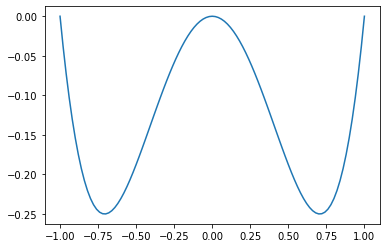

In [3]:
x1=np.linspace(-1,1,101)
y1=x1**4-x1**2

plt.plot(x1,y1)


ii). $f(x)=x+\cos x$ for $x\in[0,\pi]$.
  1. $f'(x)=1-\sin x$ .
  2. $f''(x)=-\cos x$
  3. $x=\pi/2$
  4. $f$ is always increasing.
  5. $f$ concave upwards for $x\in [\pi/2,\pi]$ and downwards for $x\in [0,\pi/2]$.
  6. on relative maximum $f(\pi)=\pi-1$ and one relative minimum $f(0)=1$.
  7. minimum, $1$,  maximum since $\pi-1$.
  8. Neither horizontal nor vertical asymptote.
  9. As follows:


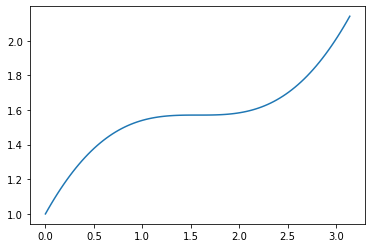

In [4]:
x1=np.linspace(0,np.pi,101)
y1=x1+np.cos(x1)

plt.plot(x1,y1)


In [2]:
# prepare for Latex Output
from IPython.display import HTML,Latex
from sympy import symbols,pprint,integrate,diff,latex,limit,simplify,Matrix,Abs,Ei,Ne,solve,Function,fraction
from sympy import pi,sqrt,sin,cos,log,tan,cot,sec,csc,exp,oo,E,tan,Piecewise,asin,atan,erf,erfc,E
from sympy import solveset,cancel,factor
from sympy.solvers.inequalities import solve_univariate_inequality

In [3]:
# diff_app
def diff_app(f_,x_,rational=False,BC=[]):
    """
    diff_app(f_,x_,rational=False)
    Inputs
       f_: function
       x_: variable
       rational: False (or True)
                 whether rational function is computered here  
    Print out
       f',f'', critical values, monotonicity and concavity
    """
    f=f_
    x=x_
    if (BC==[]):
       text="Functions:  $$\large{\quad f(x) = %s}$$" %(latex(f_))
    else:
       text="Functions:  $$\large{\quad f(x) = %s\\text{ on } [%s,%s]}$$" %(latex(f_),latex(BC[0]),latex(BC[1])) 
    
    if rational:
       d1= simplify(cancel(diff(f_,x_)))
       n,d= fraction(d1)
       sols=solve(n,x_)+solve(d,x_)
       d22=simplify(cancel(diff(f_,x_,2)))
       n_,d_=fraction(cancel(diff(f_,x_,2)))
        
       d2=cancel(n_*d_)
    else:
       d1=diff(f_,x_)
       d2=diff(f_,x_,2)
       d22= diff(f_,x_,2)
       sols=solve(diff(f_,x_),x_)
    
    
    text=text+"1. Critical Points: "
    
    if (len(sols)>0):
       criticals=""
       sols.sort()
       for sol in sols:
          criticals=criticals+" %s," %latex(sol)
  
    # Critical points
    if (len(sols)>0):
           #for sol in sols: 
           text=text+"\\begin{eqnarray}"
           text=text+ \
                "\large{f'(x)=0}& \large{\Rightarrow}&\large{%s=0 }\cr" %(latex(d1))
           d11=factor(d1)
           text=text+ \
                " &\large{\Rightarrow}&\large{%s=0} \cr" %(latex(d11))            
           text=text+ \
                "&\large{\Rightarrow}&\large{ x= %s}" %(latex(criticals))
           #text=text+" $%s$," %latex(sols )
           text=text+"\end{eqnarray}"
    else:
      text=text+"$$\large{f'=%s=0\Rightarrow\\text{ no critical point exists.}}$$" %latex(d1)
    
    
    text=text+"$$\large{f''(x)=%s=%s}$$" %(latex(diff(d1,x_)),latex(factor(d22)))
    # Monotoncity
    
    if (solve(diff(f_,x_)>0)!=[]):
       incr= solve_univariate_inequality(diff(f_,x)>0, x, relational=False)
       #increasing=latex(solve(diff(f_,x)>0)) 
       increasing=latex(incr) 
    else:
        increasing=""
    if (solve(diff(f_,x_)<0)!=[]):
       decr = solve_univariate_inequality(diff(f_,x)<0, x, relational=False)
       #decreasing=latex(solve(diff(f_,x_)<0)) 
       decreasing=latex(decr)  
    else:
        decreasing=""
    
    text=text+"2. Increasing or Decreasing:"
    
    text=text+"\\begin{eqnarray}"
    if increasing!="":
       text=text+ \
        "&\quad\\text{a) Increasing, }f'(x)>0, \\text{ at }&%s\cr" %increasing
    else:
       text=text+ \
        "&\quad\\text{a) No $x$ Increasing, i.e }f'(x)\le0 \cr"
    if decreasing!="":
       text=text+ \
        "&\quad\\text{b) Decreasing, }f'(x)<0, \\text{ at }&%s\cr" %decreasing
    else:
       text=text+ \
        "&\quad\\text{b) No $x$ Decreasing, i.e }f'(x)\ge0 \cr" 
    text=text+"\\end{eqnarray}"
    #text="\\begin{eqnarray}"  
    
    # Concavity
    
    if (solve(d2>0)!=[]):
       up=solve_univariate_inequality(d2>0, x, relational=False) 
       #up=latex(solve(d2>0)) 
    else:
        up=""
    if (solve(d2<0)!=[]):
        down=solve_univariate_inequality(d2<0, x, relational=False)
       #down=latex(solve(d2<0)) 
    else:
        down=""
    
    text=text+"3. Concave Upwards or Downwards:"
    
    text=text+"\\begin{eqnarray}"
    if up!="":
       text=text+ \
        "&\quad\\text{a) Concave Upwards, }f''(x)>0, \\text{ at }&%s\cr" %latex(up)
    else:
       text=text+ \
        "&\quad\\text{a) No $x$ Concave Upwards, i.e }f''(x)\le0 \cr"
    if down!="":
       text=text+ \
        "&\quad\\text{b) Concave Downwards, }f''(x)<0, \\text{ at }&%s\cr" %latex(down)
    else:
       text=text+ \
        "&\quad\\text{b) No $x$  Concave Downwards, i.e }f''(x)\ge0 \cr" 
    text=text+"\\end{eqnarray}"
    
   
    #text="\end{eqnarray}"
    return(Latex(text))                         

In [6]:
x=symbols("x",real=True)

In [38]:
f=(x**4+4)/(x)**2
diff_app(f,x,rational=True)

<IPython.core.display.Latex object>

In [40]:
x_=np.linspace(-5,3,101)
x2=np.linspace(-3,-1,101)
def f_(x):
    return (x**4+4)/(x+1)**2

ex.line(x=x2,y=f_(x2),range_y=(-2,25))
ex.line(x=x_,y=f_(x_),range_y=(-2,25))

In [52]:
f=x*exp(-x**2/3)
diff_app(f,x)

<IPython.core.display.Latex object>

In [53]:
x_=np.linspace(-3,3,101)

def f_(x):
    return x*np.exp(-x**2/3)

ex.line(x=x_,y=f_(x_),range_y=(-2,2))

In [56]:
f=(x**3+4)/x**2
diff_app(f,x)

<IPython.core.display.Latex object>